In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import keras
keras.__version__

'2.11.0'

In [4]:
df = pd.read_csv('/Users/miloszksiazek/Desktop/ALK/Advanced_python/final_python/NASDAQ_100_Data_From_2010.csv', delimiter='\t')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
df_apple = df[df['Name'] == 'AAPL']
df_nvidia = df[df['Name'] == 'NVDA']

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Name          object
dtype: object

In [7]:
df["Date"]= pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Name                 object
dtype: object

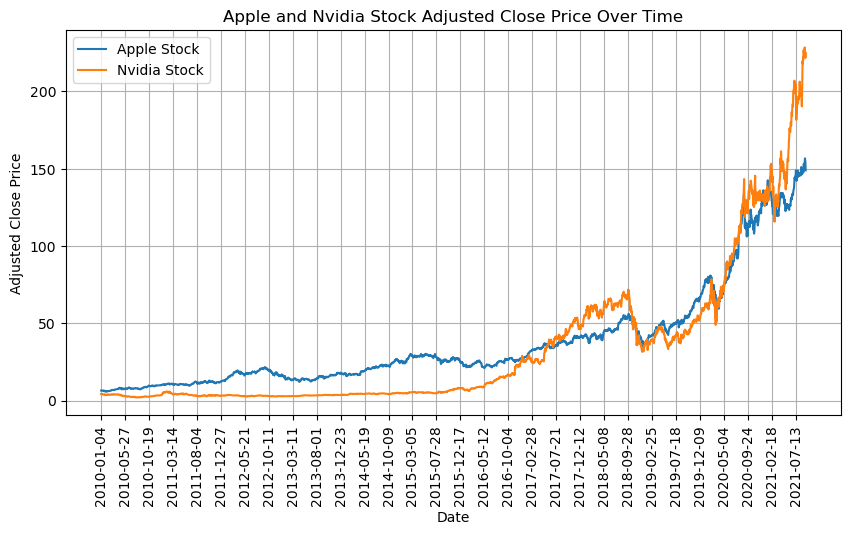

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_apple['Date'], df_apple['Adj Close'], label='Apple Stock')
plt.plot(df_nvidia['Date'], df_nvidia['Adj Close'], label='Nvidia Stock')
plt.title('Apple and Nvidia Stock Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(ticks=df_apple['Date'][::100], rotation=90)  # Adjust the step value (500) as needed
plt.legend()
plt.grid(True)
plt.show()

In [41]:
df = pd.read_csv('/Users/miloszksiazek/Desktop/ALK/Advanced_python/final_python/NASDAQ_100_Data_From_2010.csv', delimiter='\t')

In [42]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [12]:
df.shape

(271680, 8)

In [14]:
df["Name"].unique()

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB',
       'BKNG', 'CDNS', 'CDW', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST',
       'CPRT', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DOCU',
       'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA',
       'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH',
       'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'OKTA', 'ORLY', 'PAYX',
       'PCAR', 'PDD', 'PEP', 'PTON', 'PYPL', 'QCOM', 'REGN', 'ROST',
       'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TCOM', 'TEAM',
       'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY',
       'XEL', 'XLNX', 'ZM'], dtype=object)

In [8]:
# apple, nvidia, amazon, microsoft, netflix, tesla, meta, ebay, pepsi, starbukcs
df_10 = df[(df['Name'] == 'AAPL') | (df['Name'] == 'NVDA') | (df['Name'] == 'AMZN') | (df['Name'] == 'MSFT') | (df['Name'] == 'NFLX') | (df['Name'] == 'TSLA') | (df['Name'] == 'FB') | (df['Name'] == 'EBAY') | (df['Name'] == 'PEP') | (df['Name'] == 'SBUX')]

df_10 = df_10.sort_values(by=['Name', 'Date'])

df_10.reset_index(drop=True, inplace=True)

df_10.shape

(28709, 8)

In [9]:
columns_to_normalize = df_10.columns[1:-1]

mean = df_10[columns_to_normalize].mean(axis=0)
std = df_10[columns_to_normalize].std(axis=0)

normalized_data = (df_10[columns_to_normalize] - mean) / std

normalized_data['Date'] = df_10['Date'].values
normalized_data['Name'] = df_10['Name'].values

normalized_data = normalized_data[['Date'] + list(columns_to_normalize) + ['Name']]

In [10]:
normalized_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,-0.387964,-0.388336,-0.387770,-0.388110,-0.384379,4.111639,AAPL
1,2010-01-05,-0.387867,-0.388246,-0.387698,-0.388079,-0.384353,5.111977,AAPL
2,2010-01-06,-0.387885,-0.388276,-0.387907,-0.388361,-0.384594,4.651968,AAPL
3,2010-01-07,-0.388102,-0.388540,-0.388049,-0.388393,-0.384622,3.958147,AAPL
4,2010-01-08,-0.388222,-0.388540,-0.388048,-0.388278,-0.384523,3.685161,AAPL


In [11]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, LSTM, GRU

In [12]:
sequence_length = 60

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].drop(['Date', 'Name'], axis=1).values
        label = data.iloc[i + seq_length]['Adj Close']
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X, y = create_sequences(normalized_data, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22919, 60, 6), (5730, 60, 6), (22919,), (5730,))

In [33]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='RMSprop', loss='mse')

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 58, 64)            1216      
                                                                 
 batch_normalization_2 (Batc  (None, 58, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 27, 128)           24704     
                                                                 
 batch_normalization_3 (Batc  (None, 27, 128)          512       
 hNormalization)                                                 
                                                      

Epoch 1/20


2024-06-14 16:35:18.250879: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


573/573 [==============================] - 4s 5ms/step - loss: 0.8997 - val_loss: 0.0578
Epoch 2/20
573/573 [==============================] - 3s 6ms/step - loss: 0.0942 - val_loss: 0.0256
Epoch 3/20
573/573 [==============================] - 3s 6ms/step - loss: 0.0694 - val_loss: 0.1348
Epoch 4/20
573/573 [==============================] - 4s 6ms/step - loss: 0.0506 - val_loss: 0.1628
Epoch 5/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0409 - val_loss: 0.0835
Epoch 6/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0357 - val_loss: 0.0919
Epoch 7/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0304 - val_loss: 0.0287
Epoch 8/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0313 - val_loss: 0.0459
Epoch 9/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0279 - val_loss: 0.0279
Epoch 10/20
573/573 [==============================] - 4s 7ms/step - loss: 0.0247 - val_loss: 0.0298
Epoch 11/2

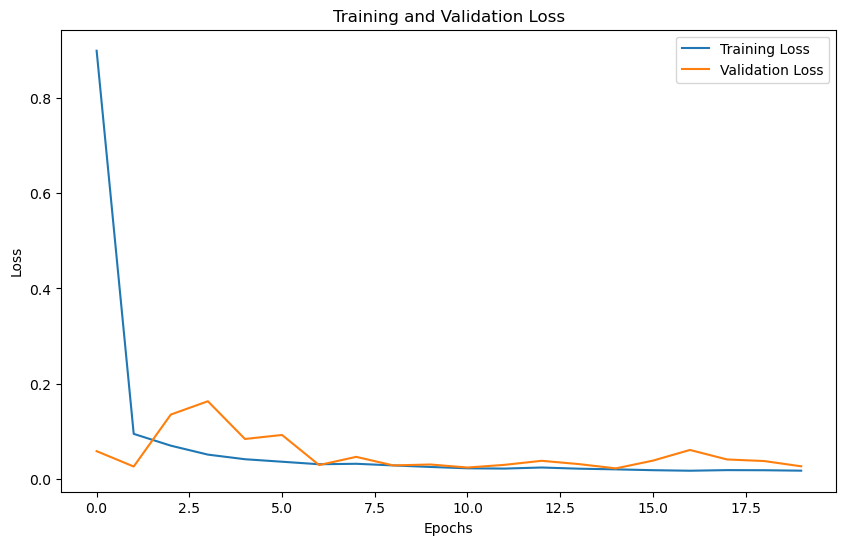

In [34]:
history_cnn = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Display the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='RMSprop', loss='mae')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,201
Trainable params: 34,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
573/573 [==============================] - 20s 32ms/step - loss: 0.0470 - val_loss: 0.0348
Epoch 2/10
573/573 [==============================] - 18s 32ms/step - loss: 0.0293 - val_loss: 0.0288
Epoch 3/10
573/573 [==============================] - 18s 32ms/step - loss: 0.0252 - val_loss: 0.0230
Epoch 4/10
573/573 [==============================] - 18s 31ms/step - loss: 0.0226 - val_loss: 0.0209
Epoch 5/10
573/573 [==============================] - 18s 31ms/step - loss: 0.0210 - val_loss: 0.0154
Epoch 6/10
573/573 [==============================] - 19s 33ms/step - loss: 0.0198 - val_loss: 0.0270
Epoch 7/10
573/573 [==============================] - 19s 33ms/step - loss: 0.0186 - val_loss: 0.0142
Epoch 8/10
573/573 [==============================] - 19s 33ms/step - loss: 0.0177 - val_loss: 0.0166
Epoch 9/10
573/573 [==============================] - 18s 31ms/step - loss: 0.0173 - val_loss: 0.0180
Epoch 10/10
573/573 [==============================] - 17s 30ms/step - loss: 0.016

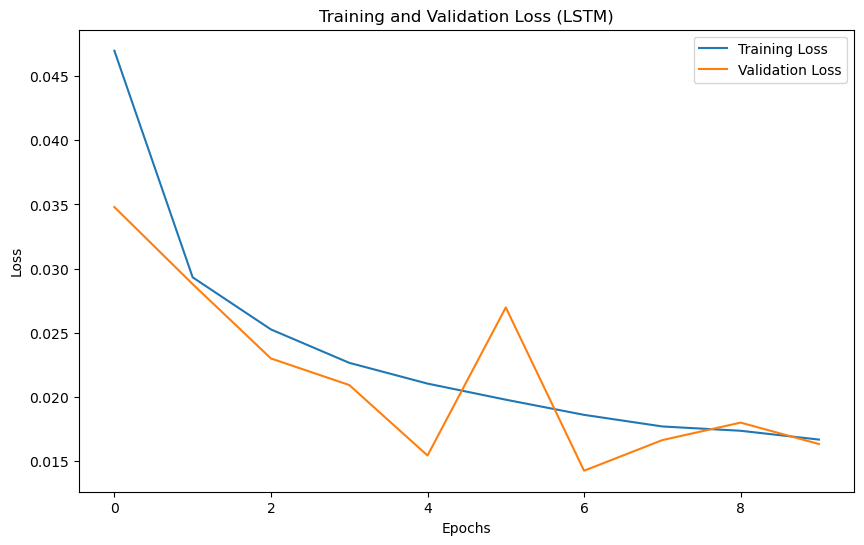

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
train_corr = lstm_model.fit(X_train, y_train)
test_corr = lstm_model.fit(X_test, y_test)

180/180 [==============================] - 5s 28ms/step - loss: 0.0175


In [41]:
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    GRU(50),
    Dense(50, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='RMSprop', loss='mae')

gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 60, 50)            8700      
                                                                 
 gru_3 (GRU)                 (None, 50)                15300     
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________


In [42]:
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
573/573 [==============================] - 18s 29ms/step - loss: 0.0448 - val_loss: 0.0208
Epoch 2/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0262 - val_loss: 0.0275
Epoch 3/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0233 - val_loss: 0.0166
Epoch 4/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0214 - val_loss: 0.0192
Epoch 5/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0196 - val_loss: 0.0211
Epoch 6/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0189 - val_loss: 0.0114
Epoch 7/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0181 - val_loss: 0.0215
Epoch 8/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0177 - val_loss: 0.0171
Epoch 9/10
573/573 [==============================] - 17s 29ms/step - loss: 0.0173 - val_loss: 0.0112
Epoch 10/10
573/573 [==============================] - 17s 29ms/step - loss: 0.016

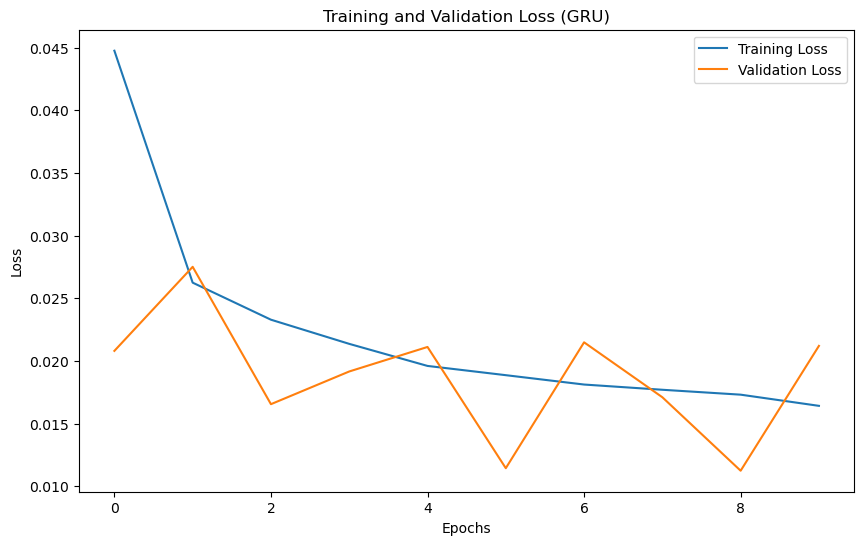

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
cr_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(1)
])

cr_model.compile(optimizer='adam', loss='mse')

cr_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 64)            1216      
                                                                 
 batch_normalization_4 (Batc  (None, 58, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 27, 128)           24704     
                                                                 
 batch_normalization_5 (Batc  (None, 27, 128)          512       
 hNormalization)                                                 
                                                      

In [45]:
cr_history = cr_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
573/573 [==============================] - 11s 16ms/step - loss: 0.1465 - val_loss: 0.2474
Epoch 2/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0854 - val_loss: 0.0257
Epoch 3/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0824 - val_loss: 0.0436
Epoch 4/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0551 - val_loss: 0.1924
Epoch 5/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0487 - val_loss: 0.0204
Epoch 6/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0319 - val_loss: 0.0380
Epoch 7/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0283 - val_loss: 0.0197
Epoch 8/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0234 - val_loss: 0.0216
Epoch 9/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0214 - val_loss: 0.0244
Epoch 10/20
573/573 [==============================] - 9s 15ms/step - loss: 0.0205 - val_l

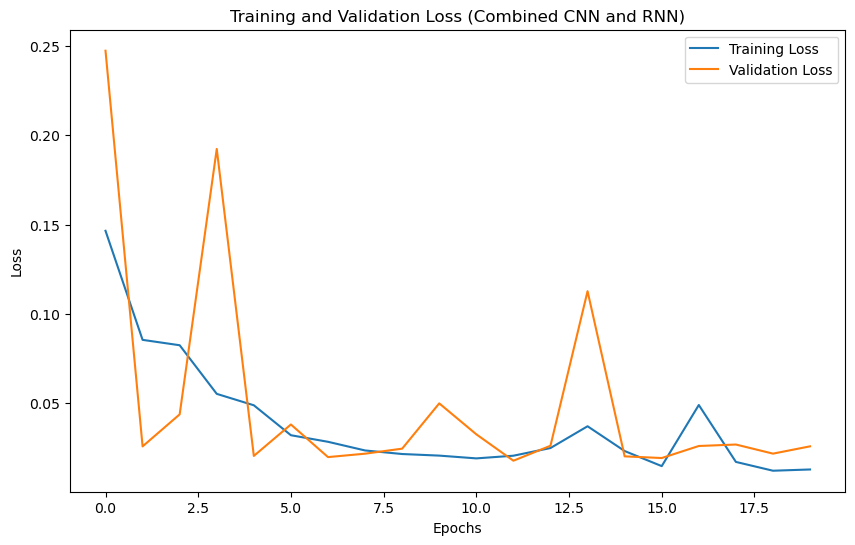

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(cr_history.history['loss'], label='Training Loss')
plt.plot(cr_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Combined CNN and RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
#CNN model
cnn_test_loss = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Loss: {cnn_test_loss}")

#LSTM model
lstm_test_loss = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_test_loss}")

#GRU model
gru_test_loss = gru_model.evaluate(X_test, y_test)
print(f"GRU Test Loss: {gru_test_loss}")

# combined CNN and RNN model
cr_test_loss = cr_model.evaluate(X_test, y_test)
print(f"Combined CNN and RNN Test Loss: {cr_test_loss}")

180/180 [==============================] - 0s 1ms/step - loss: 0.0239
CNN Test Loss: 0.02388788014650345
180/180 [==============================] - 1s 7ms/step - loss: 0.0169
LSTM Test Loss: 0.016860567033290863
180/180 [==============================] - 1s 6ms/step - loss: 0.0224
GRU Test Loss: 0.022435754537582397
180/180 [==============================] - 1s 3ms/step - loss: 0.0235
Combined CNN and RNN Test Loss: 0.023503975942730904


In [ ]:
#BEST TWO MODEL WAS WITH ONLY LSTM AND GRU

In [106]:
keras.models.save_model(model=lstm_model, filepath='/Users/miloszksiazek/Desktop/ALK/Advanced_python/final_python/LSTM_MODEL', 
                           save_format='h5')
keras.models.save_model(model=gru_model, filepath='/Users/miloszksiazek/Desktop/ALK/Advanced_python/final_python/GRU_MODEL', 
                           save_format='h5')